# Plotting Particle Count and Avg Area per Frame

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your CSV data into the DataFrame
df_summaryA = pd.read_csv('aggregationA2 Summary Particle Count and Avg Area per Frame.csv')
df_summaryB = pd.read_csv('aggregationB Summary Particle Count and Avg Area per Frame.csv')

In [67]:
def smooth(time,data,window_size):
    data_s = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    time_s = time[(window_size-1)//2 : -(window_size-1)//2]
    return time_s,data_s

#### Aggregation A

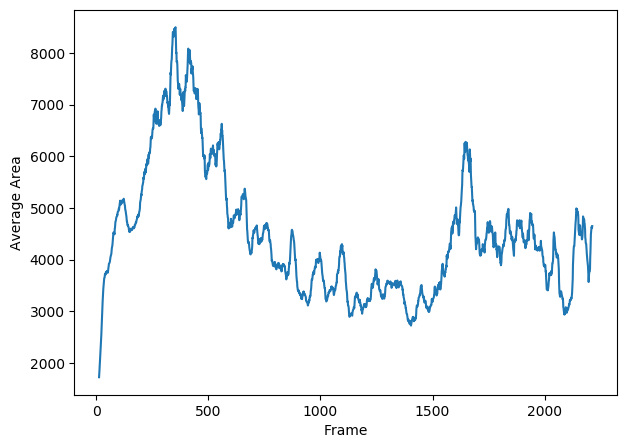

In [73]:
# Plotting
plt.figure(figsize=(7, 5))
frames, avg_area = smooth(df_summaryA['Slice'], df_summaryA['Average Size'], 25)
plt.plot(frames, avg_area, label='Average Area')

plt.xlabel('Frame')
plt.ylabel('Average Area')
# plt.title('Change in Average Cluster Area over Time')
# plt.legend()
plt.savefig('aB_change_in_cluster_area.png')
plt.show()

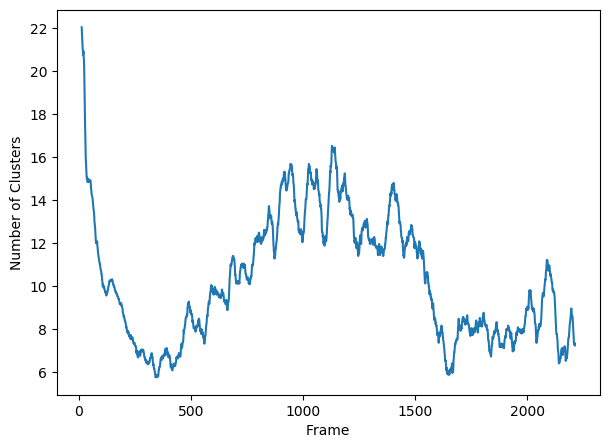

In [69]:
# Plotting
plt.figure(figsize=(7, 5))
frames, clusters = smooth(df_summaryA['Slice'], df_summaryA['Count'], 25)
plt.plot(frames, clusters, label='Number of Clusters')

plt.xlabel('Frame')
plt.ylabel('Number of Clusters')
# plt.title('Change in Number of Clusters over Time')
# plt.legend()
plt.savefig('aB_change_in_cluster_count.png')
plt.show()

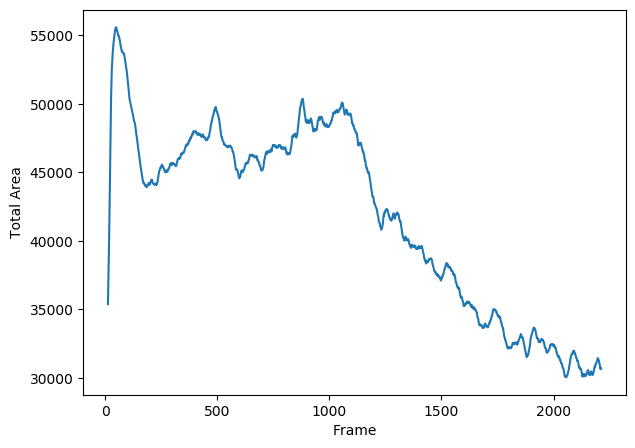

In [84]:
# Plotting
plt.figure(figsize=(7, 5))
frames, clusters = smooth(df_summaryA['Slice'], df_summaryA['Total Area'], 25)
plt.plot(frames, clusters, label='Total Area')

plt.xlabel('Frame')
plt.ylabel('Total Area')
# plt.title('Change in Number of Clusters over Time')
# plt.legend()
plt.savefig('aB_change_in_cluster_count.png')
plt.show()

#### Aggregation B

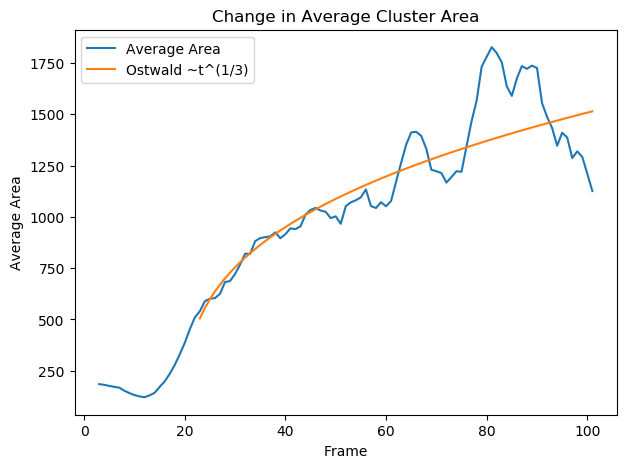

In [132]:
# Plotting
plt.figure(figsize=(7, 5))
frames, avg_area = smooth(df_summaryB['Slice'], df_summaryB['Average Size'], 5)
ostwald = [350*(x-20)**(1/3) for x in frames]
for i in range(20):
    ostwald[i] = 0

plt.plot(frames, avg_area, label='Average Area')
plt.plot(frames[20:], ostwald[20:], label='Ostwald ~t^(1/3)')
plt.xlabel('Frame')
plt.ylabel('Average Area')
plt.title('Change in Average Cluster Area')
plt.legend()
plt.savefig('aB_change_in_cluster_area.png')
plt.show()

In [101]:
avg_area

array([ 184.7308,  181.2828,  176.0786,  171.306 ,  167.4276,  152.5212,
        141.0654,  131.2514,  124.853 ,  120.86  ,  129.6622,  142.0164,
        170.7428,  197.5986,  234.2162,  277.5146,  329.717 ,  385.739 ,
        451.4556,  509.5306,  539.8998,  588.9966,  601.255 ,  603.9374,
        624.5662,  682.0406,  687.373 ,  721.813 ,  766.8738,  820.56  ,
        820.0222,  881.8972,  896.4968,  900.9626,  905.1854,  924.529 ,
        895.7576,  915.4812,  944.1138,  940.1284,  953.6994, 1011.2938,
       1033.9532, 1043.754 , 1030.768 , 1024.892 ,  993.8828, 1002.7532,
        966.1302, 1052.1496, 1070.862 , 1081.0816, 1095.3528, 1133.8736,
       1052.6518, 1043.2556, 1071.2424, 1051.7466, 1077.2006, 1171.9298,
       1263.6136, 1351.8704, 1411.7004, 1414.4912, 1394.4366, 1331.8404,
       1229.8454, 1222.4112, 1213.6478, 1166.9718, 1194.1506, 1222.524 ,
       1220.014 , 1344.9584, 1466.5912, 1566.5106, 1731.857 , 1780.2412,
       1826.9396, 1798.1958, 1752.8594, 1636.167 , 

In [97]:
frames

2        3
3        4
4        5
5        6
6        7
      ... 
96      97
97      98
98      99
99     100
100    101
Name: Slice, Length: 99, dtype: int64

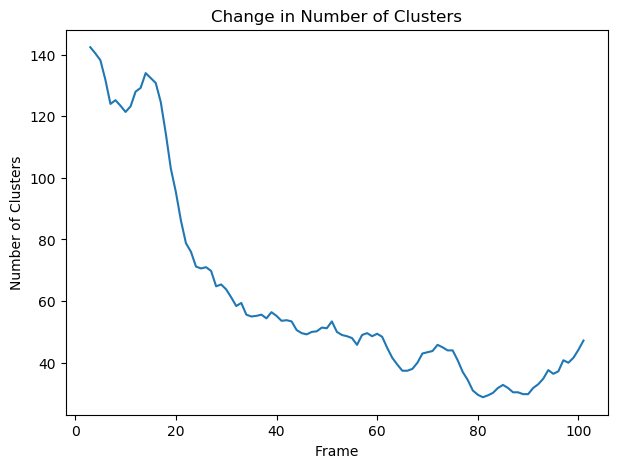

In [133]:
# Plotting
plt.figure(figsize=(7, 5))
frames, clusters = smooth(df_summaryB['Slice'], df_summaryB['Count'], 5)
plt.plot(frames, clusters, label='Number of Clusters')

plt.xlabel('Frame')
plt.ylabel('Number of Clusters')
plt.title('Change in Number of Clusters')
# plt.legend()
plt.savefig('aB_change_in_cluster_count.png')
plt.show()

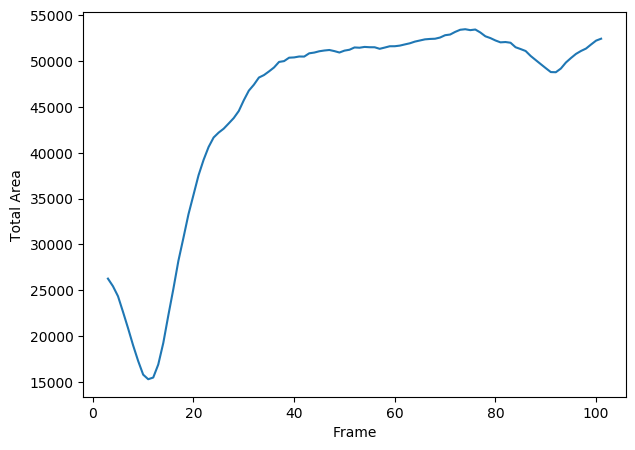

In [86]:
# Plotting
plt.figure(figsize=(7, 5))
frames, clusters = smooth(df_summaryB['Slice'], df_summaryB['Total Area'], 5)
plt.plot(frames, clusters, label='Total Area')

plt.xlabel('Frame')
plt.ylabel('Total Area')
plt.title('Change in Total Area')
# plt.legend()
# plt.savefig('aB_change_in_total_area.png')
plt.show()

# Plotting Size of Largest Cluster per Frame

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#### Aggregation A

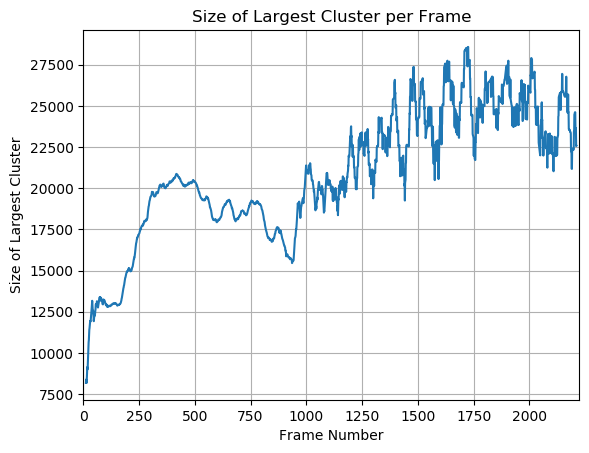

In [65]:
# Step 1: Read the data
df_summaryA = pd.read_csv('aggregationA2 Summary Particle Count and Avg Area per Frame.csv')  # DataFrame with frame-level data
df_clustersA = pd.read_csv('aggregationA2 Data of all Particles and Areas per Frame.csv')  # DataFrame with cluster-level data

# Step 2: Calculate cumulative sum of clusters per frame
cumulative_clustersA = df_summaryA['Count'].cumsum()

# Step 3: Calculate frame number for each cluster entry
df_clustersA['Frame'] = pd.cut(df_clustersA.index, bins=[0] + cumulative_clustersA.tolist(), labels=df_summaryA.index)

# Step 4: Process the data
max_cluster_sizesA = df_clustersA.groupby('Frame')['Area'].max()
xA, yA = smooth(max_cluster_sizesA.index, max_cluster_sizesA.values, 25)

# Step 5: Plot the data
plt.plot(xA, yA, linestyle='-')
plt.xlabel('Frame Number')
plt.ylabel('Size of Largest Cluster')
plt.title('Size of Largest Cluster per Frame')
plt.xlim([0,len(df_summaryA)])
plt.grid(True)
plt.show()

#### Aggregation B

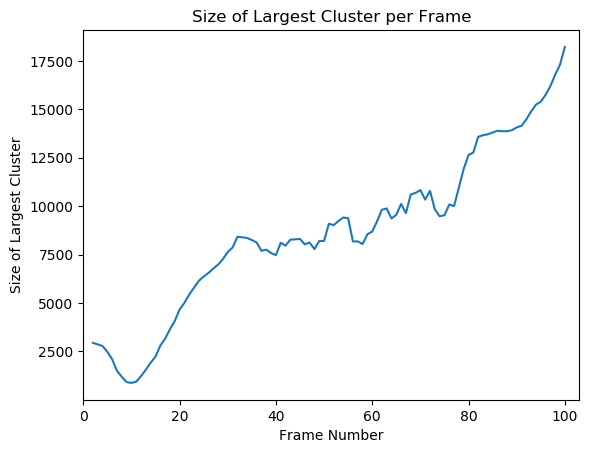

In [131]:
# Step 1: Read the data
df_summaryB = pd.read_csv('aggregationB Summary Particle Count and Avg Area per Frame.csv')  # DataFrame with frame-level data
df_clustersB = pd.read_csv('aggregationB Data of all Particles and Areas per Frame.csv')  # DataFrame with cluster-level data

# Step 2: Calculate cumulative sum of clusters per frame
cumulative_clustersB = df_summaryB['Count'].cumsum()

# Step 3: Calculate frame number for each cluster entry
df_clustersB['Frame'] = pd.cut(df_clustersB.index, bins=[0] + cumulative_clustersB.tolist(), labels=df_summaryB.index)

# Step 4: Process the data
max_cluster_sizesB = df_clustersB.groupby('Frame')['Area'].max()

indices_B_smoothed, max_cluster_B_smoothed = smooth(max_cluster_sizesB.index, max_cluster_sizesB.values, 5)

# Step 5: Plot the data
plt.plot(indices_B_smoothed, max_cluster_B_smoothed, linestyle='-')
plt.xlabel('Frame Number')
plt.ylabel('Size of Largest Cluster')
plt.title('Change in Size of Largest Cluster')
plt.xlim([0,len(df_summaryB)])
# plt.grid(True)
plt.savefig('aB_change_in_max_area.png')
plt.show()

# Plotting Histograms of Particle Areas Over Time

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import clear_output

#### Aggregation A

In [83]:
# Load your CSV data into the DataFrame
# df_summary = pd.read_csv('Summary Particle Count and Avg Area per Slice.csv')
# df_particles = pd.read_csv('Data of all Particles and Areas for Every Slice.csv')
df_summaryA = pd.read_csv('aggregationA2 Summary Particle Count and Avg Area per Frame.csv')
df_particlesA = pd.read_csv('aggregationA2 Data of all Particles and Areas per Frame.csv')

# Calculate the index ranges for each frame
# We use cumulative sum to determine the last index of particles for each frame
df_summaryA['cumulative_particles'] = df_summaryA['Count'].cumsum()

# Convert the cumulative sum to integer for use as indices
df_summaryA['cumulative_particles'] = df_summaryA['cumulative_particles'].astype(int)

# Loop through each frame and display a histogram
for frame_number in range(len(df_summaryA)):
    plt.figure(figsize=(6, 5))
    
    # Determine the start and end indices for the current frame
    start_idx = 0 if frame_number == 0 else df_summaryA.iloc[frame_number - 1]['cumulative_particles']
    end_idx = df_summaryA.iloc[frame_number]['cumulative_particles']
    
    bin_edges = [0,250,500,1000,5000,10000,30000] # [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    
    # Filter particles for the current frame using the determined indices
    current_frame_particles = df_particlesA.iloc[int(start_idx):int(end_idx)]
    current_frame_particles['Area'] = np.where(current_frame_particles['Area'] > max(bin_edges), max(bin_edges)-1, current_frame_particles['Area'])
    
    # Calculate the histogram data, normalize it to get the proportion
    counts, bins = np.histogram(current_frame_particles['Area'], bins=bin_edges) # Adjust bins as needed
    counts = counts.astype(float) # / counts.sum() # Normalize to get proportions
    
    # Plot the histogram for the current frame
    plt.bar(bins[:-1], counts, width=250, edgecolor='black')
    
    # Set title and labels
    plt.title(f'Frame {frame_number + 1}')
    plt.xlabel('Area')
    plt.ylabel('Count')
#     plt.xlim([0,1000])
    plt.ylim([0,30])
    
    # Display the histogram
    plt.show()
    
    # Pause for a bit before the next plot
    time.sleep(0.1) # Pause for half a second; adjust as needed
    
    # Clear the output to display the next histogram
    clear_output(wait=True)
    
#     if frame_number == 79:
#         break

KeyboardInterrupt: 

#### Aggregation B

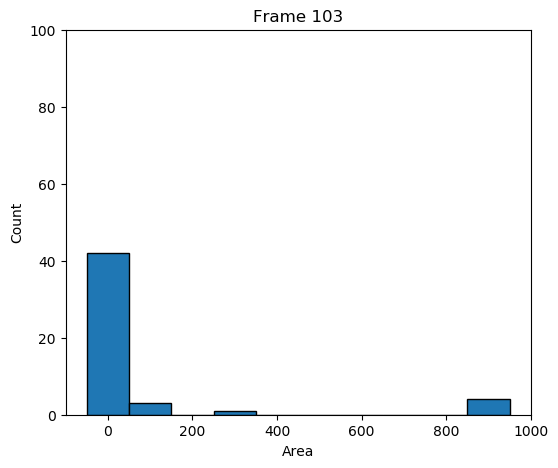

In [74]:
# Load your CSV data into the DataFrame
# df_summary = pd.read_csv('Summary Particle Count and Avg Area per Slice.csv')
# df_particles = pd.read_csv('Data of all Particles and Areas for Every Slice.csv')
df_summaryB = pd.read_csv('aggregationB Summary Particle Count and Avg Area per Frame.csv')
df_particlesB = pd.read_csv('aggregationB Data of all Particles and Areas per Frame.csv')

# Calculate the index ranges for each frame
# We use cumulative sum to determine the last index of particles for each frame
df_summaryB['cumulative_particles'] = df_summaryB['Count'].cumsum()

# Convert the cumulative sum to integer for use as indices
df_summaryB['cumulative_particles'] = df_summaryB['cumulative_particles'].astype(int)

# Loop through each frame and display a histogram
for frame_number in range(len(df_summaryB)):
    plt.figure(figsize=(6, 5))
    
    # Determine the start and end indices for the current frame
    start_idx = 0 if frame_number == 0 else df_summaryB.iloc[frame_number - 1]['cumulative_particles']
    end_idx = df_summaryB.iloc[frame_number]['cumulative_particles']
    
    # Filter particles for the current frame using the determined indices
    current_frame_particles = df_particlesB.iloc[int(start_idx):int(end_idx)]
    current_frame_particles['Area'] = np.where(current_frame_particles['Area'] > 999, 999, current_frame_particles['Area'])
    
    # Calculate the histogram data, normalize it to get the proportion
    bin_edges = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    counts, bins = np.histogram(current_frame_particles['Area'], bins=bin_edges) # Adjust bins as needed
    counts = counts.astype(float) # / counts.sum() # Normalize to get proportions
    
    # Plot the histogram for the current frame
    plt.bar(bins[:-1], counts, width=np.diff(bins), edgecolor='black')
    
    # Set title and labels
    plt.title(f'Frame {frame_number + 1}')
    plt.xlabel('Area')
    plt.ylabel('Count')
#     plt.xlim([0,1000])
    plt.ylim([0,100])
    
    # Display the histogram
    plt.show()
    
    # Pause for a bit before the next plot
    time.sleep(0.1) # Pause for half a second; adjust as needed
    
    # Clear the output to display the next histogram
    clear_output(wait=True)
    
#     if frame_number == 79:
#         break

###